In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./output/CD128.csv', index_col=0)
df.tail()

,mention,obj,prob,pmid
217,GC,disease,NaN,34516330
218,miR-215,RNA,0.506902,34516330
219,CXCR1,gene,0.980901,34516330
220,PCED1B-AS1,gene,0.995459,34516330
221,GC,disease,NaN,34516330


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mention  222 non-null    object 
 1   obj      222 non-null    object 
 2   prob     213 non-null    float64
 3   pmid     222 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 8.7+ KB


In [4]:
df = df.astype({
    "prob": "float16",
    "pmid": "int32",})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mention  222 non-null    object 
 1   obj      222 non-null    object 
 2   prob     213 non-null    float16
 3   pmid     222 non-null    int32  
dtypes: float16(1), int32(1), object(2)
memory usage: 6.5+ KB


In [5]:
G = nx.from_pandas_edgelist(df, source='pmid', target='mention', edge_attr=['obj'])
len(G.nodes())

97

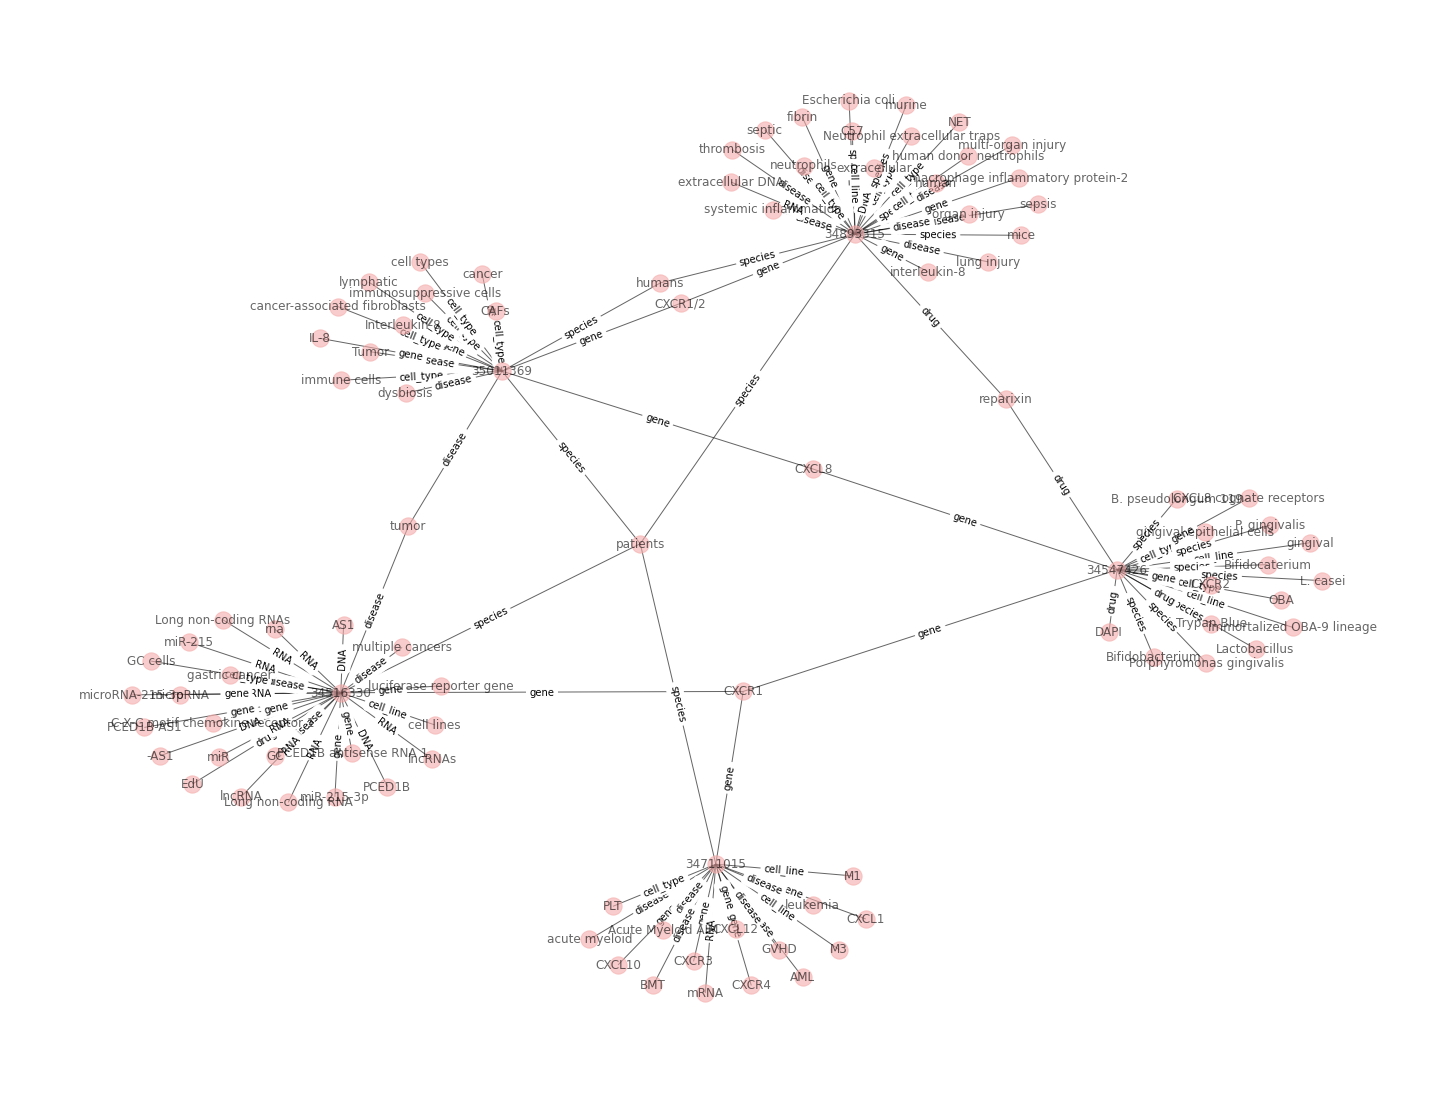

In [6]:
# Specify figure size
plt.figure(figsize=(20,15))

# Compute node position using the default spring_layout  
node_position = nx.spring_layout(G)
nx.draw(G, node_position, node_color='#F4ABAA', with_labels=True, alpha=0.6)

# # Add edge weights
edge_labels = nx.get_edge_attributes(G,'obj')
nx.draw_networkx_edge_labels(G, node_position, edge_labels=edge_labels)
plt.show()